In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import PIL


In [2]:
import seaborn as sns

In [3]:
red =  (255, 0, 0, 255) # vom folosi culoarea rosu pentru segmentarea data in problema in input
green =  (0, 255, 0, 255) #vom folosi culoarea verde pentru segmentarea noastra proprie

In [4]:
black = (0, 0, 0 , 255)
white = (255, 255, 255, 255)

In [5]:
import os

In [6]:
path = "C:\\Users\\Istrati Lucian\Desktop\Proiect Segmentare Organe"
nameFolder = "\\input"

matrixIndexes = [107, 89, 121, 187]

hounsfieldINSuffix = "-HU.in"
segmentationINSuffix = "-seg.in"

hounsfieldMatrices = []
segmentationMatrices = []

hounsfieldMatrixPaths = []
segmentationMatrixPaths = []

matrixDimension = 512 
"""
analizand imaginile si  numarul de caractere din fisierele din input am ajuns la 
concluzia ca dimensiunea matricilor din input este de 512 pe 512
"""

minimalValues = [1e9] * 4
maximalValues = [-1e9] * 4

print("The next 8 files were uploaded")
for i in range(1,5):#from 1 to 4, as inputs are
    
    newNameFolder = nameFolder + str(i)
    newPath = path + newNameFolder 
    
    hounsfieldMatrixPath = newPath +"\\"+ str(matrixIndexes[i-1]) + hounsfieldINSuffix # calea pentru matricea cu valorile Hounsfield
    segmentationMatrixPath = newPath +"\\"+ str(matrixIndexes[i-1]) + segmentationINSuffix # calea pentru matricea cu segmentarea initiala
   
    print(hounsfieldMatrixPath)
    print(segmentationMatrixPath)
    
    hounsfieldMatrixPaths.append(hounsfieldMatrixPath)
    segmentationMatrixPaths.append(segmentationMatrixPath)
    
    hounsfieldInput = np.loadtxt(hounsfieldMatrixPath, dtype='i', delimiter=' ')
    segmentationInput = np.loadtxt(segmentationMatrixPath, dtype='i', delimiter=' ')
    
    hounsfieldMatrices.append(hounsfieldInput)
    segmentationMatrices.append(segmentationInput)

print("The minimum and maximal values for each interval are:")
for i in range(4):
    for j in range(matrixDimension):
        for k in range(matrixDimension):
            minimalValues[i]=min(minimalValues[i],hounsfieldMatrices[i][j][k])
            maximalValues[i]=max(maximalValues[i],hounsfieldMatrices[i][j][k])
    print("[{} ; {}]".format(minimalValues[i],maximalValues[i]))

The next 8 files were uploaded
C:\Users\Istrati Lucian\Desktop\Proiect Segmentare Organe\input1\107-HU.in
C:\Users\Istrati Lucian\Desktop\Proiect Segmentare Organe\input1\107-seg.in
C:\Users\Istrati Lucian\Desktop\Proiect Segmentare Organe\input2\89-HU.in
C:\Users\Istrati Lucian\Desktop\Proiect Segmentare Organe\input2\89-seg.in
C:\Users\Istrati Lucian\Desktop\Proiect Segmentare Organe\input3\121-HU.in
C:\Users\Istrati Lucian\Desktop\Proiect Segmentare Organe\input3\121-seg.in
C:\Users\Istrati Lucian\Desktop\Proiect Segmentare Organe\input4\187-HU.in
C:\Users\Istrati Lucian\Desktop\Proiect Segmentare Organe\input4\187-seg.in
The minimum and maximal values for each interval are:
[-3024 ; 1601]
[-3024 ; 1415]
[-3024 ; 1505]
[-3024 ; 1337]


In [7]:
"""
Partea de conversie a imaginilor din input din in in png
"""

hounsfieldImages = []
segmentationImages = []

hounsfieldImagesPaths = []
segmentationImagesPaths = []

hounsfieldPNGSuffix = "-HU2.png"
segmentationPNGSuffix = "-seg2.png"

for i in range(4):
    
    newPathHounsfield = hounsfieldMatrixPaths[i][:65]
    newPathSegmentation = segmentationMatrixPaths[i][:65]
    
    index = hounsfieldMatrixPaths[i][65:68] if i!=1 else hounsfieldMatrixPaths[i][65:67]
    
    hounsfieldOutput = newPathHounsfield + index + hounsfieldPNGSuffix
    segmentationOutput = newPathSegmentation + index + segmentationPNGSuffix
    
    print(hounsfieldOutput)
    print(segmentationOutput)
    
    
    hounsfieldImagesPaths.append(hounsfieldOutput)
    segmentationImagesPaths.append(segmentationOutput)

C:\Users\Istrati Lucian\Desktop\Proiect Segmentare Organe\input1\107-HU2.png
C:\Users\Istrati Lucian\Desktop\Proiect Segmentare Organe\input1\107-seg2.png
C:\Users\Istrati Lucian\Desktop\Proiect Segmentare Organe\input2\89-HU2.png
C:\Users\Istrati Lucian\Desktop\Proiect Segmentare Organe\input2\89-seg2.png
C:\Users\Istrati Lucian\Desktop\Proiect Segmentare Organe\input3\121-HU2.png
C:\Users\Istrati Lucian\Desktop\Proiect Segmentare Organe\input3\121-seg2.png
C:\Users\Istrati Lucian\Desktop\Proiect Segmentare Organe\input4\187-HU2.png
C:\Users\Istrati Lucian\Desktop\Proiect Segmentare Organe\input4\187-seg2.png


In [8]:
from PIL import Image
from matplotlib.pyplot import cm
from sklearn.preprocessing import StandardScaler

#Creation of Segmentation Images

for i in range(4):
    plt.imsave(segmentationImagesPaths[i], segmentationMatrices[i], cmap="Greys")
    
    
#Scaling from Hounsfield Interval to 0-255 for unsigned char 
for i in range(4):
    for j in range(matrixDimension):
        for k in range(matrixDimension):
            aux = hounsfieldMatrices[i][j][k]
            aux = (255 * (aux - minimalValues[i]))/ (maximalValues[i] - minimalValues[i])
            #Rescaling - min-max Normalization


#Creation of Hounsfield Images
for i in range(4):
    plt.imsave(hounsfieldImagesPaths[i], hounsfieldMatrices[i], cmap="Greys")
    #himg.save()

In [9]:
def convertOptToPNG(outputMatrices,outputMatrixPaths):
    for i in range(4):
        plt.imsave(outputMatrixPaths[i],outputMatrices[i],cmap="Greys")

In [10]:
def calculateIntersection(firstMatrix,secondMatrix):
    matrixDimension = 512 
    oneUnion, OneIntersection = 0,0
    for i in range(matrixDimension):
        for j in range(matrixDimension):
            if firstMatrix[i][j]==1 or secondMatrix[i][j]==1:
                oneUnion+=1
            if secondMatrix[i][j]==1 and secondMatrix[i][j]==1:
                oneIntersection+=1
    print("The intersection over union percentage is {}".format(oneIntersection/oneUnion))

In [11]:
def createCompare(hounsfieldImagesPaths):
    compareSuffix = "-compare2.png"
    comparePNGPaths=[]
    for i in range(4):
        auxiliaryPath = hounsfieldImagesPaths[i][:-8]
        auxiliaryPath+=compareSuffix
        comparePNGPaths.append(auxiliaryPath)
    print("The following {} PNG images were created: ".format(len(comparePNGPaths)))
    for i in range(4):
        print(comparePNGPaths[i])
        plt.imsave(comparePNGPaths[i],hounsfieldMatrices[i],cmap="Greys")
    return comparePNGPaths

In [12]:
image_numbers = [107,89,121,187]
def compareColors(f,s):
    return f[0]==s[0] and f[1]==s[1] and f[2]==s[2] and f[3]==s[3]

In [36]:
redPositions = {}
fx=1
fy=2
def drawRedLineOverCompare(comparePNGPaths,segmentationImagesPaths,color): #red is the color of the doctor segmentation
    matrixDimension = 512
    p,q = 0,0
    
  
    for i in range(4):
        
        myImage = Image.open(comparePNGPaths[i])
        myImagePixeled = myImage.load()
        
        mySegmentation = Image.open(segmentationImagesPaths[i])
        mySegmentationPixeled = mySegmentation.load()
    
        for j in range(1,matrixDimension-1):
            for k in range(1,matrixDimension-1):
                if compareColors(mySegmentationPixeled[j,k],black)==True:
                    for p in range(j-1,j+2):
                        for q in range(k-1,k+2):
                            if p == j and q == k:
                                continue
                            else: 
                                if compareColors(mySegmentationPixeled[p,q], white)==True:
                                    myImagePixeled[j,k]=color
                                    redPositions[(i,j,k)]=True
                                    fx=j
                                    fy=k
        suffix = "-compare3.png"
        organHounsfieldValuesImagePath = "C:\\Users\\Istrati Lucian\\Desktop\\Proiect Segmentare Organe\\input" + str(i+1) + "\\"
        #img.rotate(180).show()
        plt.imsave(organHounsfieldValuesImagePath + str(image_numbers[i]) + suffix,myImage,cmap="Greys")
        myImage.show()
        
      # plt.imsave(comparePNGPaths[i],np.array(myImagePixeled , dtype=np.uint8 ),cmap="Greys")
       
        
comparePNGPaths = createCompare(hounsfieldImagesPaths)
drawRedLineOverCompare(comparePNGPaths,segmentationImagesPaths,red)
fx=198
fy=201
print(fx)
print(fy)


The following 4 PNG images were created: 
C:\Users\Istrati Lucian\Desktop\Proiect Segmentare Organe\input1\107-compare2.png
C:\Users\Istrati Lucian\Desktop\Proiect Segmentare Organe\input2\89-compare2.png
C:\Users\Istrati Lucian\Desktop\Proiect Segmentare Organe\input3\121-compare2.png
C:\Users\Istrati Lucian\Desktop\Proiect Segmentare Organe\input4\187-compare2.png
198
201


In [15]:
print(red)
print(black)
print(white)
print(green)

(255, 0, 0, 255)
(0, 0, 0, 255)
(255, 255, 255, 255)
(0, 255, 0, 255)


In [16]:
import cv2

In [17]:
import dicom as pdicom
import copy

C:\ProgramData\Anaconda3\lib\site-packages\dicom\__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


In [18]:
import pydicom
import scipy.ndimage
myNNImages = []

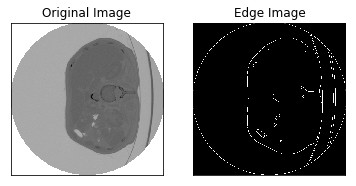

In [19]:
import cv2
edgesImagesList = []
#import opencv-python
edgeImagePath = "C:\\Users\\Istrati Lucian\\Desktop\\Proiect Segmentare Organe\\input1\\"
suffix = "-HU2-Edge.png"
img = cv2.imread("C:\\Users\\Istrati Lucian\\Desktop\\Proiect Segmentare Organe\\input1\\107-HU2.png",0)
edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.imsave(edgeImagePath + str(107) + suffix,edges,cmap="Greys")
plt.show()
edgesImagesList.append(edgeImagePath)



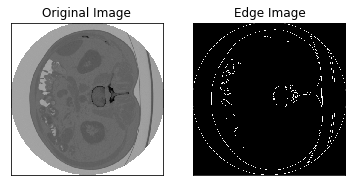

In [20]:
edgeImagePath = "C:\\Users\\Istrati Lucian\\Desktop\\Proiect Segmentare Organe\\input2\\"
img = cv2.imread("C:\\Users\\Istrati Lucian\\Desktop\\Proiect Segmentare Organe\\input2\\89-HU2.png",0)
edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])


plt.imsave(edgeImagePath + str(89) + suffix,edges,cmap="Greys")
plt.show()
edgesImagesList.append(edgeImagePath)

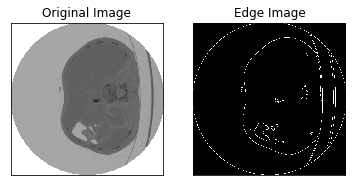

In [21]:
edgeImagePath = "C:\\Users\\Istrati Lucian\\Desktop\\Proiect Segmentare Organe\\input3\\"
img = cv2.imread("C:\\Users\\Istrati Lucian\\Desktop\\Proiect Segmentare Organe\\input3\\121-HU2.png",0)
edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])


plt.imsave(edgeImagePath + str(121) + suffix,edges,cmap="Greys")
plt.show()
edgesImagesList.append(edgeImagePath)

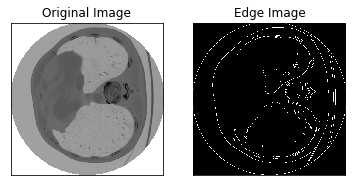

In [22]:
edgeImagePath = "C:\\Users\\Istrati Lucian\\Desktop\\Proiect Segmentare Organe\\input4\\"
img = cv2.imread("C:\\Users\\Istrati Lucian\\Desktop\\Proiect Segmentare Organe\\input4\\187-HU2.png",0)
edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.imsave(edgeImagePath + str(187) + suffix,edges,cmap="Greys")
plt.show()
edgesImagesList.append(edgeImagePath)

In [23]:
from PIL import Image
import numpy as np
from keras_unet.utils import get_patches

x = np.array(Image.open("C:\\Users\\Istrati Lucian\\Desktop\\Proiect Segmentare Organe\\input1\\107-HU2.png"))
print("x shape: ", str(x.shape))

x_crops = get_patches(
    img_arr=x, # required - array of images to be cropped
    size=100, # default is 256
    stride=100) # default is 256

print("x_crops shape: ", str(x_crops.shape))

Using TensorFlow backend.


x shape:  (512, 512, 4)
x_crops shape:  (25, 100, 100, 4)


In [24]:

hounsfieldOrgansValues = {
    "bone":(400,1000),
    "lung":(-600,-400),
    "soft tissue":(40,80),
    "fat":(-100,-60),
}
mi = min(minimalValues)
mx = max(maximalValues)

for key in hounsfieldOrgansValues.keys():
    xz = hounsfieldOrgansValues[key][0]
    yu = hounsfieldOrgansValues[key][1]
    xz = (255* (xz-mi))/(mx-mi)
    yu = (255*(yu-mi))/(mx-mi)
    hounsfieldOrgansValues[key] = (xz,yu)
    
organIntervals = set(hounsfieldOrgansValues.values())
print(organIntervals)
print(hounsfieldOrgansValues)
hounsfieldOrgansColors = {
    "bone":(0, 255, 255, 255), #aqua
    "lung":(255, 255, 0, 255), # yellow 
    "soft tissue":(0, 0, 128, 255), # blue
    "fat":(128,0,128, 255), # purple
}
bicolorPaths = []

{(188.7827027027027, 221.8637837837838), (168.93405405405406, 171.13945945945946), (161.21513513513514, 163.42054054054054), (133.64756756756756, 144.6745945945946)}
{'bone': (188.7827027027027, 221.8637837837838), 'lung': (133.64756756756756, 144.6745945945946), 'soft tissue': (168.93405405405406, 171.13945945945946), 'fat': (161.21513513513514, 163.42054054054054)}


In [25]:
listFoundOrgans = []
def SegmentAfterOrganIntervals():
    copysubset = None
    foundOrgans =  [[(0,0,0,255) for _ in range(513)] for _ in range(513)]
    for i in range(4):
        for j in range(matrixDimension):
            for k in range(matrixDimension):
                ok = 0
                for subset in organIntervals:
                    if subset[0]<=hounsfieldMatrices[i][j][k] and hounsfieldMatrices[i][j][k]<=subset[1]:
                        for key in hounsfieldOrgansValues.keys():
                            if hounsfieldOrgansValues[key] == subset:
                                foundOrgans[511-j][k] = hounsfieldOrgansColors[key]
                                ok=1
                if ok==0:
                    pass
                   
        img = Image.open(comparePNGPaths[i]) 
        pixels = img.load() # create the pixel map
        
        for p in range(img.size[0],-1,-1):    # for every col:
            for q in range(img.size[1]):# For every row
                if foundOrgans[511-q][p] == (0,0,0,255):
                    continue #do no  set the colour accordingly
                else:
                    pixels[p,q] = foundOrgans[511-q][p]
        img.show()
        suffix = "-HU2-organs.png"
        organHounsfieldValuesImagePath = "C:\\Users\\Istrati Lucian\\Desktop\\Proiect Segmentare Organe\\input" + str(i+1) + "\\"
        #img.rotate(180).show()
        plt.imsave(organHounsfieldValuesImagePath + str(image_numbers[i]) + suffix,img,cmap="Greys")
        listFoundOrgans.append(foundOrgans)
    
                        
SegmentAfterOrganIntervals()

In [26]:
#Overlay what we obtained from comparing pixel values using our dictionarry of intervals for certain organs to the compare image
#import Image
import sys
def OverlayComparePNGandOrganSegmentedPNG():
    for i in range(4):
        myPath = "C:\\Users\\Istrati Lucian\\Desktop\\Proiect Segmentare Organe\\input" + str(i+1) + "\\"
        background = Image.open(myPath+str(image_numbers[i])+"-compare.png")
        overlay = Image.open(myPath+str(image_numbers[i])+"-HU2-organs.png")

        background = background.convert("RGBA")
        overlay = overlay.convert("RGBA")

        new_img = Image.blend(background, overlay, 0.5)
        new_img.save(myPath + str(image_numbers[i]) + "overlayedOrgansWithBothSegmentations.png","PNG")
        
        back = Image.open(myPath+str(image_numbers[i])+"-compare3.png")
        over = Image.open(myPath+str(image_numbers[i])+"-HU2-organs.png")

        backg = back.convert("RGBA")
        over = over.convert("RGBA")

        new_img = Image.blend(back, over, 0.5)
        new_img.save(myPath + str(image_numbers[i]) + "overlayedOrgansWithTheRedSegmentations.png","PNG")

OverlayComparePNGandOrganSegmentedPNG()

In [27]:


def findPredominantColorInMedicalArea():
    newRed = None
    for i in range(4):
        hounsCells = {
        "bone":0,
        "lung":0,
        "soft tissue":0,
        "fat":0,
        }
        
        myPath = "C:\\Users\\Istrati Lucian\\Desktop\\Proiect Segmentare Organe\\input" + str(i+1) + "\\" + str(image_numbers[i]) 
        myRedSegmentationPath = myPath +"-compare3.png"
        myOverlayedRedOrgans = myPath + "overlayedOrgansWithTheRedSegmentations.png"
        
        myRedImage = Image.open(myRedSegmentationPath).convert("RGBA")
        redSeg = myRedImage.load()
        
        img = Image.open(myOverlayedRedOrgans).convert("RGBA")
        cells = img.load()
        
        if i==0:
            newRed = cells[fx,fy]
        print(newRed)
        isThereRed = []
        firstRed = []
        lastRed = []
        for f in range(512):
            isThereRed.append(False)
            firstRed.append(0)
            lastRed.append(0)
        print(len(firstRed))
        for p in range(img.size[0]):    # for every col
            for q in range(img.size[1]):# For every row
                if (i,p,q) in redPositions.keys() and redPositions[(i,p,q)]==True:
                    isThereRed[p]=True
                    if firstRed[p] ==0:
                        firstRed[p]=q
                    lastRed[p]=q

        for p in range(img.size[0]):
            if isThereRed[p]==True:
                for q in range(firstRed[p]+1,lastRed[p]):
                    for val in hounsfieldOrgansColors.keys():
                        if hounsfieldOrgansColors[val] == listFoundOrgans[i][p][q]:
                            hounsCells[val]+=1
                            
        max = -1
        maxKey = ""
        for key in hounsCells.keys():
            if hounsCells[key] > max:
                max = hounsCells[key]
                maxKey = key
        print("We detected a {} and {} pixels that belong to it present in the medical segmentation done by the doctor in the image with the path: {}".format(maxKey,max,myOverlayedRedOrgans))
       
        

findPredominantColorInMedicalArea()

(178, 51, 51, 255)
512
We detected a lung and 1796 pixels that belong to it present in the medical segmentation done by the doctor in the image with the path: C:\Users\Istrati Lucian\Desktop\Proiect Segmentare Organe\input1\107overlayedOrgansWithTheRedSegmentations.png
(178, 51, 51, 255)
512
We detected a lung and 22 pixels that belong to it present in the medical segmentation done by the doctor in the image with the path: C:\Users\Istrati Lucian\Desktop\Proiect Segmentare Organe\input2\89overlayedOrgansWithTheRedSegmentations.png
(178, 51, 51, 255)
512
We detected a lung and 2127 pixels that belong to it present in the medical segmentation done by the doctor in the image with the path: C:\Users\Istrati Lucian\Desktop\Proiect Segmentare Organe\input3\121overlayedOrgansWithTheRedSegmentations.png
(178, 51, 51, 255)
512
We detected a lung and 683 pixels that belong to it present in the medical segmentation done by the doctor in the image with the path: C:\Users\Istrati Lucian\Desktop\Pro

In [28]:
def organInMajority(organ,indice,px,py,qx,qy):
    orgcolor = hounsfieldOrgansColors[organ]
    org = 0
    nonorg = 0
    for i in range(px,qx+1):
        for j in range(py,qy+1):
            if listFoundOrgans[indice][i][j]==orgcolor:
                org+=1
            else:
                nonorg+=1
    return org>nonorg
def colorSector(organ,indice,px,py,qx,qy,copiedImage):
    orgcolor = hounsfieldOrgansColors[organ]
    for i in range(px,qx+1):
        for j in range(py,qy+1):
            copiedImage[i][j] = orgcolor

def CreateOrganContour(organ):
    m = 512
    for v in range(4):
        newImagePath = "C:\\Users\\Istrati Lucian\\Desktop\\Proiect Segmentare Organe\\input" + str(v+1) + "\\" + str(image_numbers[v])  +"-bicolor.png"
        copiedImage = copy.deepcopy(listFoundOrgans[v])
        col = hounsfieldOrgansColors[organ]
        for i in range(m):
            for j in range(m):
                if copiedImage[i][j]==col:
                    copiedImage[i][j]=white
                else:
                    copiedImage[i][j]=black
        img = Image.open(comparePNGPaths[v])  
        pixels = img.load() 
        
        for p in range(img.size[0]-1,-1,-1):    # for every col:
            for q in range(img.size[1]):# For every row
                pixels[p,q] = copiedImage[511-q][p]
                        
        plt.imsave(newImagePath,img,cmap="Greys")
        bicolorPaths.append(newImagePath)
 
CreateOrganContour("lung")
print(bicolorPaths)

['C:\\Users\\Istrati Lucian\\Desktop\\Proiect Segmentare Organe\\input1\\107-bicolor.png', 'C:\\Users\\Istrati Lucian\\Desktop\\Proiect Segmentare Organe\\input2\\89-bicolor.png', 'C:\\Users\\Istrati Lucian\\Desktop\\Proiect Segmentare Organe\\input3\\121-bicolor.png', 'C:\\Users\\Istrati Lucian\\Desktop\\Proiect Segmentare Organe\\input4\\187-bicolor.png']


In [29]:
def mostlywhite(m,a,b,c,d):
    w=0
    b=0
    for i in range(a,c+1):
        for j in range(b,d+1):
            if m[i][j]==white[0]:
                w+=1
            else:
                b+=1
    return w>b
def colorwhite(m,a,b,c,d):
    for i in range(a,c+1):
        for j in range(b,d+1):
            m[i][j]=white[0]
    return m
def nearby(A,B,p,q,new_mat):
    for i in range(p-30,p+31):
        for j in range(q-30,q+31):
            A[i,j] = white[0]
            B[i,j] = white[0]
            new_mat[i][j] = white[0]
    return A,B
imagesForClustering =[]
def OverlayBicolorPNGandOrganSegmentedPNG():
    
    for i in range(4):
        myPath = "C:\\Users\\Istrati Lucian\\Desktop\\Proiect Segmentare Organe\\input" + str(i+1) + "\\" + str(image_numbers[i]) + "-intersection.png"
        
        back = Image.open(segmentationImagesPaths[i])
        pixback = back.load()

        over = Image.open(bicolorPaths[i])
        pixover = over.load()
        
        
        new_mat = [[0 for i in range(512)] for j in range(512)]
        
        for i in range(511):
            for j in range(512):
                if pixback[i,j]==black and pixover[i,j]==white:
                    new_mat[i][j] = white[0]
                    #pixover,pixback = nearby(pixover,pixback,i,j,new_mat)
                else:
                    new_mat[i][j] = black[0]        
        
        plt.imsave(myPath, np.array(new_mat[::-1]).reshape(512,512), cmap=cm.gray)
        imagesForClustering.append(myPath)

OverlayBicolorPNGandOrganSegmentedPNG()

In [30]:
def OwnKNearestNeighbours(imagePath,dis):
    ima = imagePath[:-3] + "KNN-"+ str(288) + "-nearest.png"
    im = Image.open(ima)
    pixels = im.load()
    vec = [8,24,48,80,120,168,224,288,360,440]
    newPath = imagePath[:-3] + "KNN-288-"+ str(vec[dis-1]) + "-nearest.png"
    for dist in range(dis+1):
        for i in range(dist,512-dist):
            for j in range(dist,512-dist):
                w = 0
                b = 0
                for p in range(i-dist,i+dist+1):
                    for q in range(j-dist,j+dist+1):
                        if pixels[p,q]==white:
                            w+=1
                        else:
                            b+=1
                if w>=b:
                    pixels[i,j]=white
    dist=8
    for i in range(dist,512-dist):
        for j in range(dist,512-dist):
            w = 0
            b = 0
            for p in range(i-dist,i+dist+1):
                for q in range(j-dist,j+dist+1):
                    if pixels[p,q]==white:
                        w+=1
                    else:
                        b+=1
            if w>=b:
                pixels[i,j]=white
    plt.imsave(newPath, im, cmap=cm.gray) 


'\nfrom sklearn.cluster import KMeans\nfrom sklearn.metrics import silhouette_score\nimport numpy as np\n\n# Use silhouette score to find optimal number of clusters to segment the data\nnum_clusters = np.arange(2,10)\nresults = {}\nfor size in num_clusters:\n    model = KMeans(n_clusters = size).fit(data)\n    predictions = model.predict(data)\n    results[size] = silhouette_score(data, predictions)\n\nbest_size = max(results, key=results.get)\n'

In [31]:
for i in range(4):
    for j in [1,2,3,4,5]:
        OwnKNearestNeighbours(imagesForClustering[i],j)

KeyboardInterrupt: 

In [37]:
myNNImages = []
vec = [8,24,48,80,120,168,224,288,360,440]
for i in range(4):
    myPath = imagesForClustering[i][:-3] + "KNN-288-"+ str(120) + "-nearest.png"
    myNNImages.append(myPath)
    im = Image.open(myPath)
    angle = 180
    out = im.rotate(angle)
    out.save(myPath)

drawRedLineOverCompare(comparePNGPaths,myNNImages,green)
def Draw():
    pass